
Bandit environment is as follows
Bandit instance:  [0.30793495 0.51939148 0.76829766 0.78922074 0.87056206 0.18792139
 0.26950525 0.49619214 0.73912175 0.19495199]
Mean reward for the optimal arm:  0.8705620624758235
Best arm:  4
Number of arm:  10
Average reward:  0.5143099409097128
10
0.1
1000


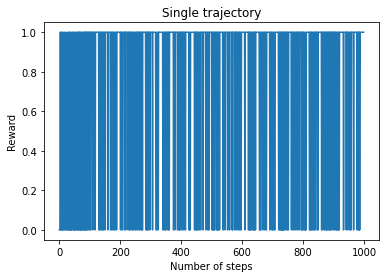

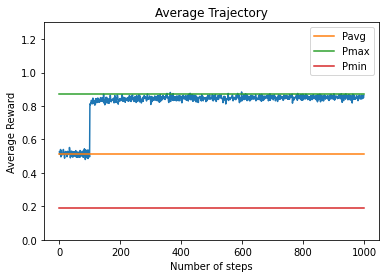

In [7]:
#Implementation of  epsilon G2 algorithm
#generating the bandit instances and identifying the best arm
import numpy as np
np.random.seed(26)
bandit_means=np.random.uniform(0,1,10) #generating the bandit instance
best_arm=np.argmax(bandit_means) #the best arm
bandit_means_optimal_arm=np.max(bandit_means) # the mean reward for the optimal arm
number_of_arms=bandit_means.shape[0] #Total number of bandits
print()
print('Bandit environment is as follows')
print('Bandit instance: ',bandit_means)
print('Mean reward for the optimal arm: ',bandit_means_optimal_arm)
print('Best arm: ',best_arm)
print('Number of arm: ',number_of_arms)
print('Average reward: ',np.average(bandit_means))
# Implementation of  epsilon G2 algorithm
#the following information will be known to the algorithm\n",
epsilon = 0.1
T = 1000
np.random.seed(24)
number_of_arms=bandit_means.shape[0]
def bandit_environment(pulled_bandit):
  p=bandit_means[pulled_bandit]
  p_dummy=np.random.uniform(0,1)
  if p_dummy<p:
    reward=1 
  else:
    reward=0
  return reward

# Implementation of  epsilon G2 algorithm
import random
def eG2(number_of_arms,epsilon,T):
  time_epoch=0 #current time epoch
  reward=np.zeros(T)
  arm_count=np.zeros(number_of_arms)
  arm_reward=np.zeros(number_of_arms)
  arm_mean=np.zeros(number_of_arms)
#Exploration phase
  while time_epoch< epsilon*T:
    #select arm randomly
    i=random.randint(0,number_of_arms-1)
    pulled_bandit_reward=bandit_environment(pulled_bandit=i)
  #print bandit_reward
    reward[time_epoch]=pulled_bandit_reward
    arm_reward[i]+=pulled_bandit_reward
    arm_count[i]+=1
    arm_mean[i]=arm_reward[i]/arm_count[i]
    time_epoch+=1
  #select best arm
  best_arm=np.argmax(arm_mean)
  #print('best_arm',best_arm)
   #exploitation phase
  while time_epoch<T:
     pulled_bandit_reward=bandit_environment(pulled_bandit=best_arm)# bandit environment generated the reward
     reward[time_epoch]=pulled_bandit_reward
     arm_reward[best_arm]+=pulled_bandit_reward
     arm_count[best_arm]+=1
     arm_mean[best_arm]=  arm_reward[best_arm]/arm_count[best_arm]
     best_arm=np.argmax(arm_mean)
     arm_mean[best_arm]=arm_reward[best_arm]/arm_count[best_arm]
     time_epoch+=1
  return reward    
print(number_of_arms)
print(epsilon)
print(T)
reward = eG2(number_of_arms, epsilon, T)  
     
#Printing the graph for single trajectory
# importing the required module
import matplotlib.pyplot as plt
#x axis value
x=range(T)
y= reward
# plotting the points
plt.plot(x,y)
# naming the x axis
plt.xlabel('Number of steps')
# naming the y axis
plt.ylabel('Reward')
#Giving a title to my graph
plt.title('Single trajectory')
#function to show the plot
plt.show()

number_of_samples=1000
expected_reward=np.zeros(T)
for experiments in range(number_of_samples):
  r=eG2(number_of_arms, epsilon ,T)
  #print(r)
  for j in range(T):
    expected_reward[j]+=r[j]
  #print expected reward
expected_reward=expected_reward/number_of_samples

#Printing the graph for average trajectory
# importing the required module
# x axis values
x = range(T)
# corresponding y axis values
y = expected_reward
y1=np.ones(T)*np.average(bandit_means)
y2=np.ones(T)*np.amax(bandit_means)
y3=np.ones(T)*np.amin(bandit_means)
#ploting the points
plt.plot(x,y)
plt.plot(x, y1, label="Pavg")
plt.plot(x, y2, label="Pmax")
plt.plot(x, y3, label="Pmin")
ax=plt.gca()
#ax.set_xlim([xmin,xmax])
ax.set_ylim([0,1.3])
#naming the x axis
plt.xlabel('Number of steps')
plt.ylabel('Average Reward')
#giving title to my graph
plt.title('Average Trajectory')
#function to show the plot
plt.legend()
plt.show()